In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from matplotlib.colors import LogNorm
import tqdm
import pickle 



from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [2]:
files = [
    "./ntupleStubsBmtfGmt_LS122.root",
    "./ntupleStubsBmtfGmt_LS133.root",
    "./ntupleStubsBmtfGmt_LS159.root",
    "./ntupleStubsBmtfGmt_LS170.root",
    "./ntupleStubsBmtfGmt_LS214.root",
    "./ntupleStubsBmtfGmt_LS237.root",
    "./ntupleStubsBmtfGmt_LS251.root",
    "./ntupleStubsBmtfGmt_LS258.root",
    "./ntupleStubsBmtfGmt_LS263.root",
    "./ntupleStubsBmtfGmt_LS264.root",
    "./ntupleStubsBmtfGmt_LS277.root",
    "./ntupleStubsBmtfGmt_LS290.root",
    "./ntupleStubsBmtfGmt_LS299.root",
    "./ntupleStubsBmtfGmt_LS306.root",
]

stub_bmtf_gmt_features = [
    'orbit', 'bx', 'nStubs', 'stubHwPhi', 'stubHwPhiB', 'stubHwQual', 'stubHwEta', 'stubHwQEta', 'stubStation', 'stubWheel', 'stubSector', 'stubTag',
    'nBmtfMuons', 'bmtfHwPt', 'bmtfHwPtu', 'bmtfHwPhi', 'bmtfHwEta', 'bmtfPt', 'bmtfPtu', 'bmtfPhi', 'bmtfEta', 'bmtfHwSign', 'bmtfHwSignValid', 
    'bmtfHwDXY', 'bmtfHwQual', 'bmtfProcessor', 
    'nGmtMuons', 'gmtHwPt', 'gmtHwPtu', 'gmtHwPhi', 'gmtHwEta', 'gmtHwPhiAtVtx', 'gmtHwEtaAtVtx', 'gmtPt', 'gmtPtu', 'gmtPhi', 'gmtEta', 
    'gmtPhiAtVtx', 'gmtEtaAtVtx', 'gmtCharge', 'gmtDxy', 'gmtQual', 'gmtTfIndex']

stub_bmtf_gmt_list = []
for file in files:
    with uproot.open(file) as f:
        evs = f["bmtfNtuplizer/Events"]
        temp_awk = evs.arrays(stub_bmtf_gmt_features, library="ak")
        stub_bmtf_gmt_list.append(temp_awk)

Array = ak.concatenate(stub_bmtf_gmt_list)

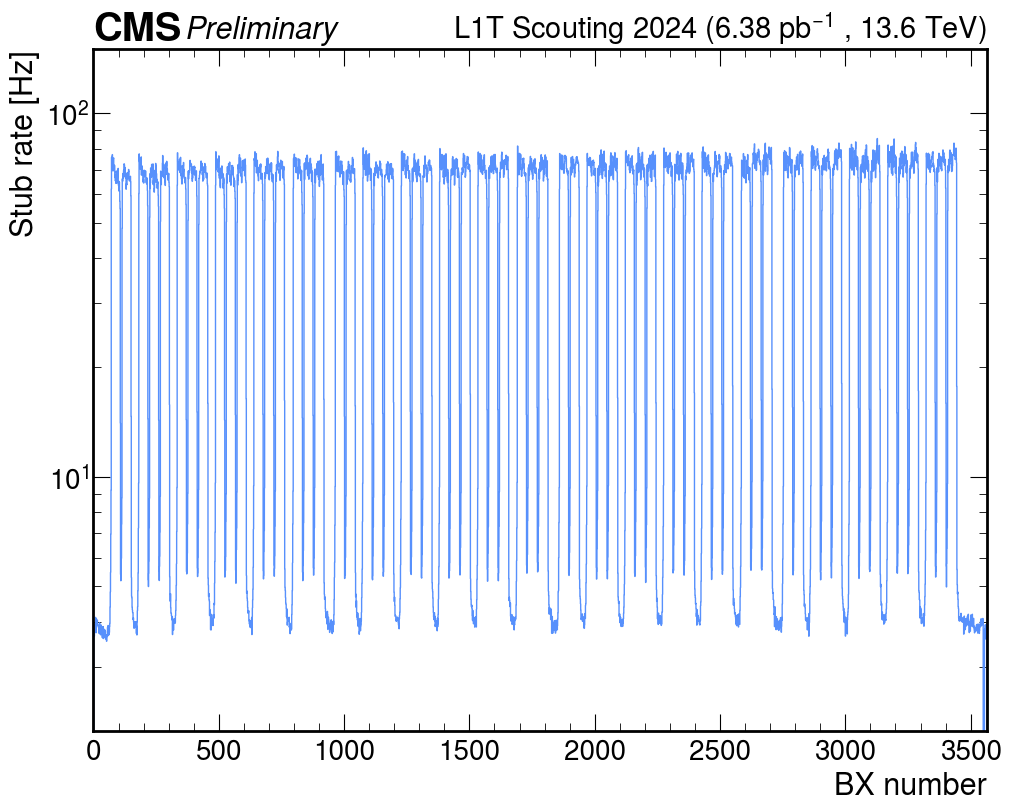

In [3]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts1 = np.bincount(Array.bx, weights=Array.nStubs)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts1) / 14, histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, 3564)
ax.set_ylim(2, 150)

ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumber.pdf")

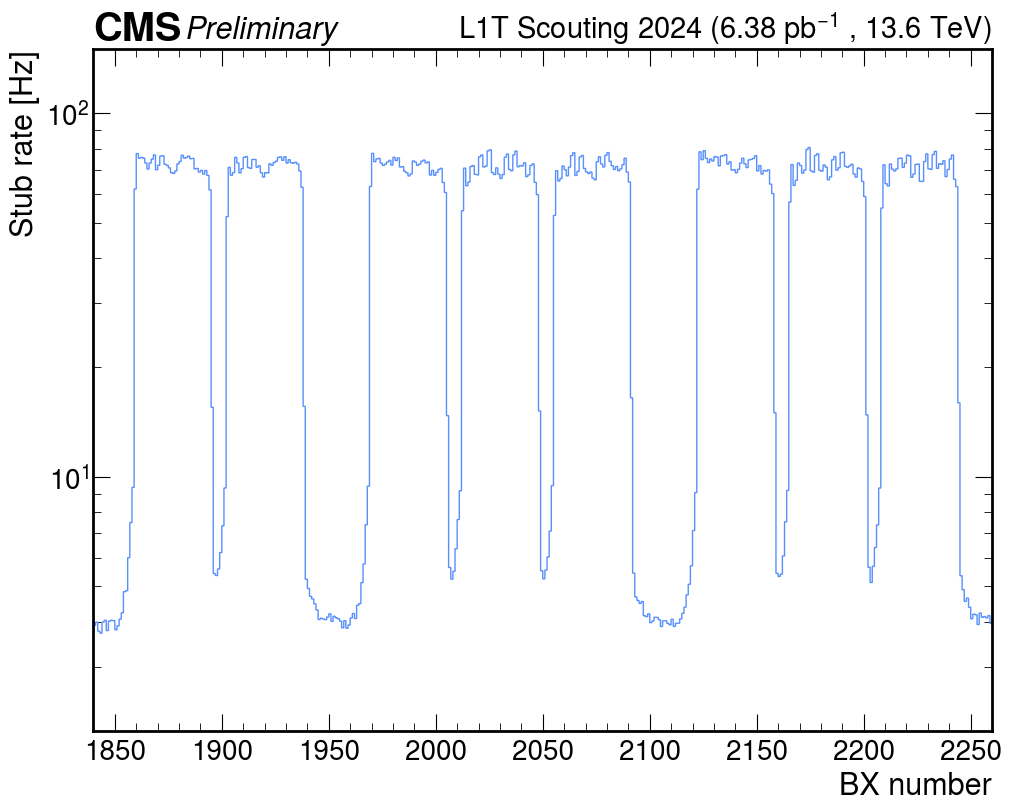

In [ ]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts1) / 14, histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(1840, 2260)
ax.set_ylim(2, 150)


ax.set_yscale('log')

plt.savefig("../Immagini/StubsBXnumberZoom.pdf")

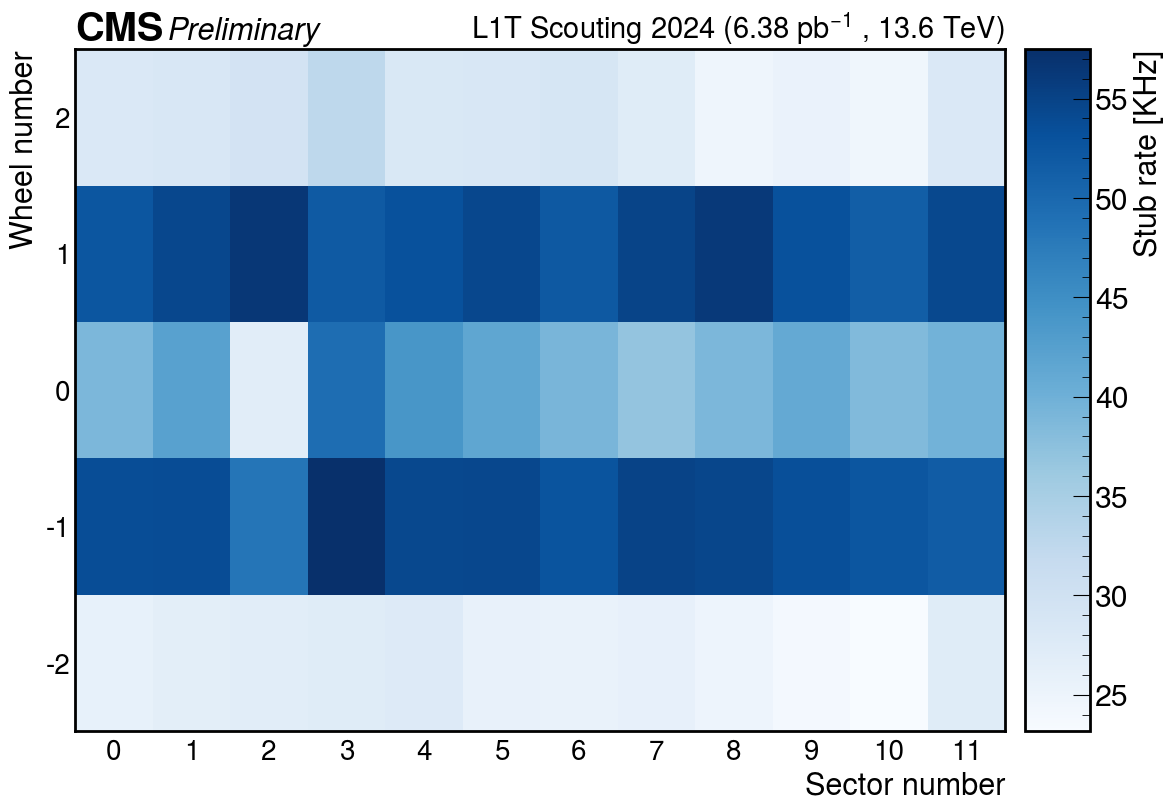

In [ ]:
stub_sectors = ak.ravel(Array.stubSector)
stub_wheels  = ak.ravel(Array.stubWheel)

sector_bins = np.arange(13)
wheel_bins  = np.arange(-2, 4)

hist2d = hist.Hist(
    hist.axis.Variable(sector_bins, name='sector', label='Sector number'),
    hist.axis.Variable(wheel_bins, name='wheel', label='Wheel number'),
)
hist2d.fill(sector=stub_sectors, wheel=stub_wheels)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

hep.hist2dplot(ConvertToKHz(hist2d), cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('Stub rate [KHz]', fontsize=FONTSIZE)

ax.set_xlabel('Sector number', fontsize = FONTSIZE)
ax.set_ylabel('Wheel number', fontsize = FONTSIZE)

ax.set_xticks(np.arange(12)+0.5)
ax.set_xticklabels(np.arange(12))

ax.set_yticks(np.arange(-2, 3)+0.5)
ax.set_yticklabels(np.arange(-2, 3))

plt.savefig("../Immagini/StubsSectorWheel.pdf")

plt.show()

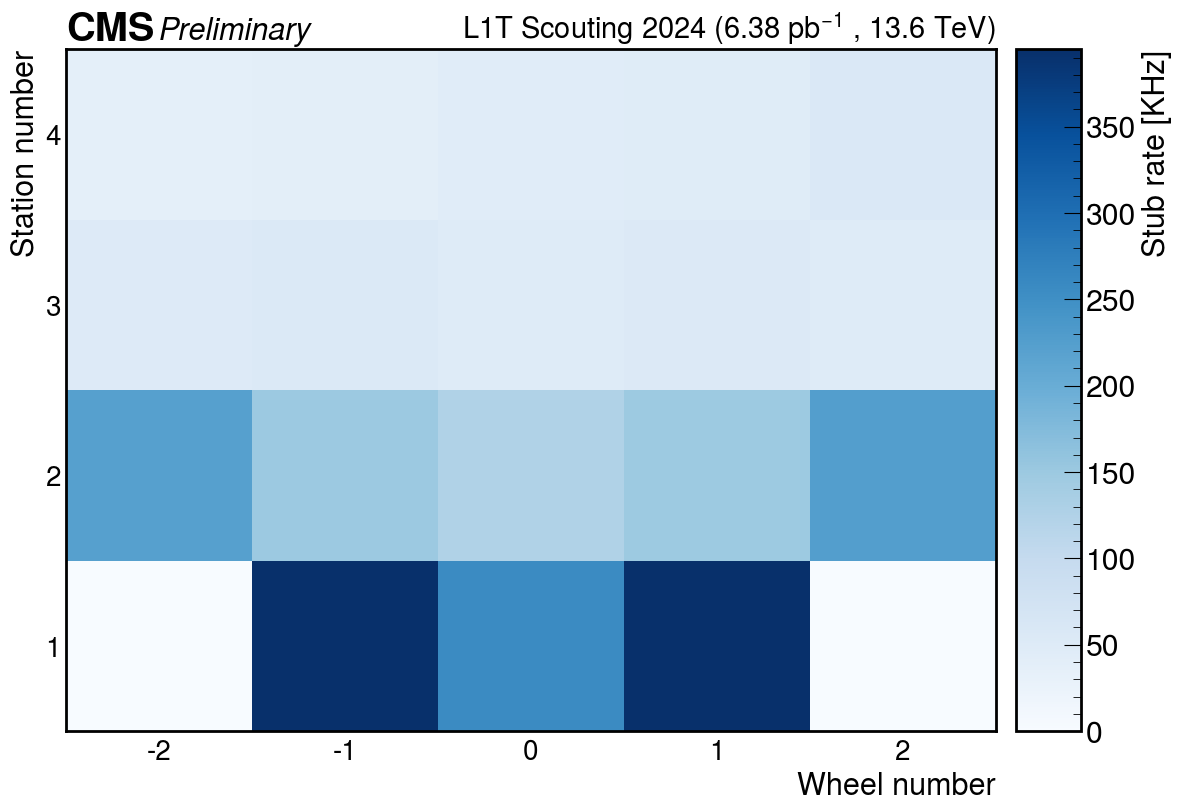

In [ ]:
stub_station = ak.ravel(Array.stubStation)
stub_wheels  = ak.ravel(Array.stubWheel)

Station_bins = np.arange(1, 6)
wheel_bins  = np.arange(-2, 4)

hist2d = hist.Hist(
    hist.axis.Variable(wheel_bins, name='wheel', label='Wheel number'),
    hist.axis.Variable(Station_bins, name='Station', label='Station number'),
)
hist2d.fill(wheel=stub_wheels, Station=stub_station)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

hep.hist2dplot(ConvertToKHz(hist2d), cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('Stub rate [KHz]', fontsize=FONTSIZE)

ax.set_ylabel('Station number', fontsize = FONTSIZE)
ax.set_xlabel('Wheel number', fontsize = FONTSIZE)

ax.set_yticks(np.arange(1, 5)+0.5)
ax.set_yticklabels(np.arange(1, 5))

ax.set_xticks(np.arange(-2, 3)+0.5)
ax.set_xticklabels(np.arange(-2, 3))

plt.savefig("../Immagini/StubsStationWheel.pdf")

plt.show()

In [ ]:
stubsPerBX = np.bincount(Array.nStubs)

print(len(stubsPerBX))

20


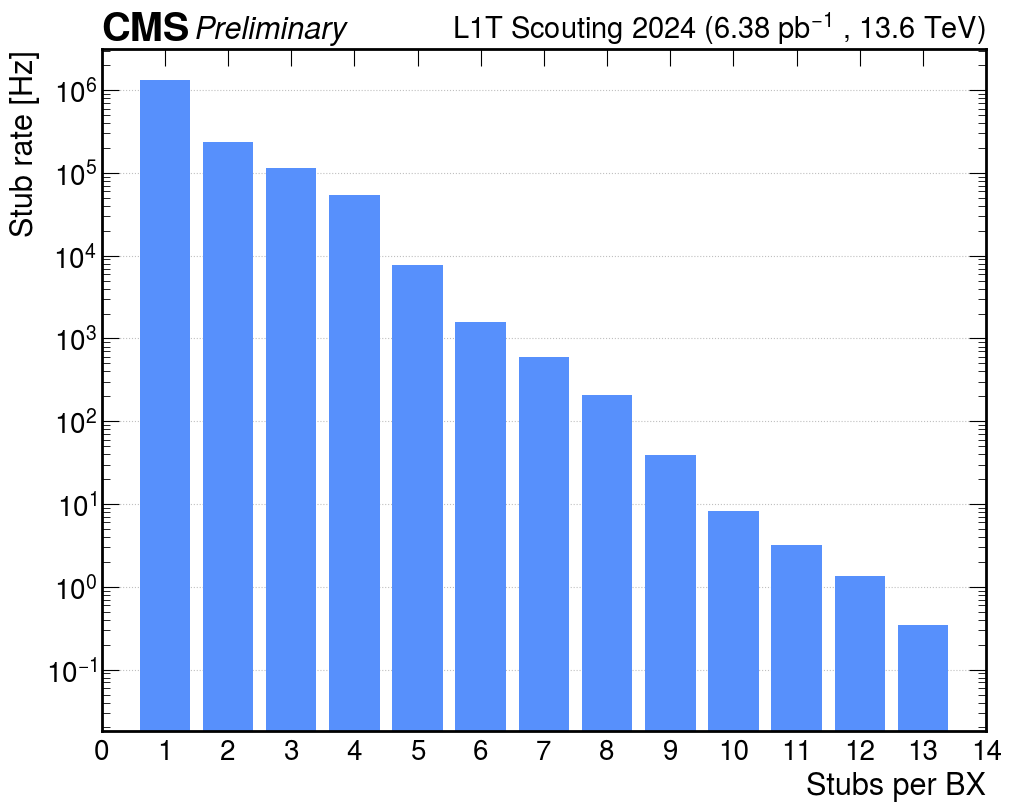

In [ ]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(20), ConvertToHz(stubsPerBX))

ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, 14)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)

plt.savefig("../Immagini/StubsMolteplicity.pdf")

In [ ]:
#AllStubsPerOrbit = StubsPerOrbit(Array.bx, Array.nStubs)

In [ ]:
#ak.to_parquet(ak.Array(AllStubsPerOrbit), "AllStubsPerOrbit.parquet")

AllStubsPerOrbit = ak.from_parquet("AllStubsPerOrbit.parquet")

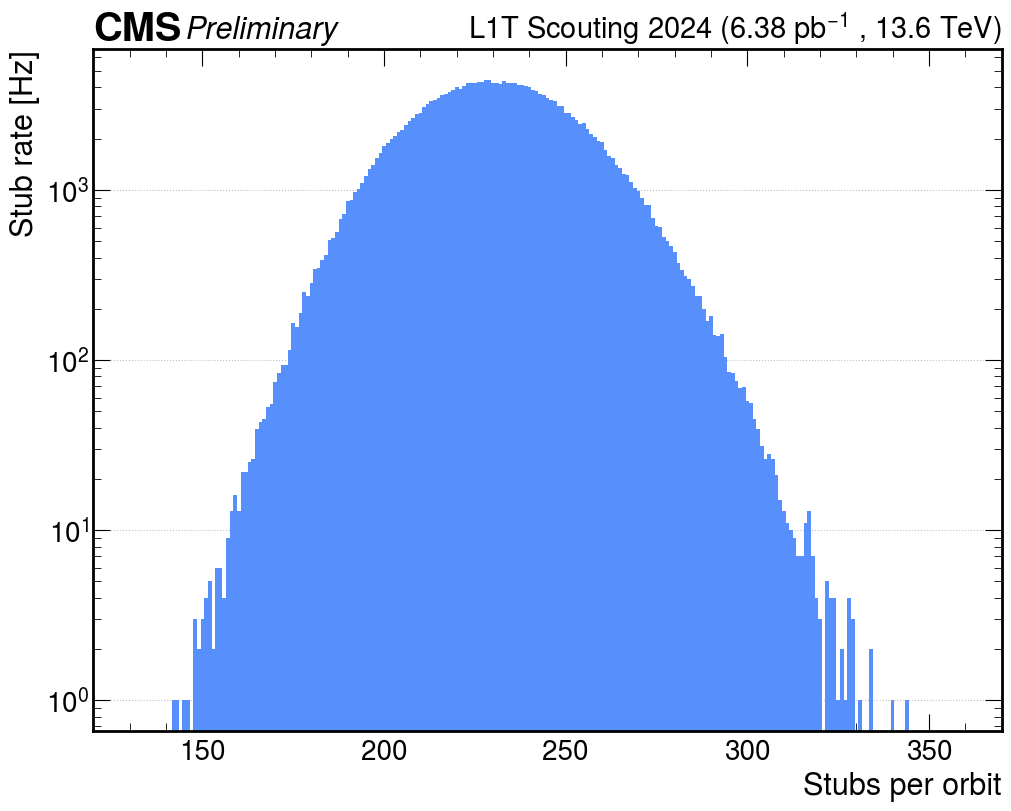

In [ ]:

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

bins = np.arange(1, len(AllStubsPerOrbit) + 1)

StubsPerOrbit_Hist = hist.Hist(hist.axis.Variable(bins, name="Stubs", ))

#StubsPerOrbit_Hist.fill(Stubs=AllStubsPerOrbit)
#hep.histplot(StubsPerOrbit_Hist, label = "Stubs per Orbit", ax=ax, yerr = False, lw = 2)


ax.bar(np.arange(1, len(AllStubsPerOrbit) + 1), AllStubsPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor')
ax.set_xlabel('Stubs per orbit')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(120, 370)

ax.grid(visible=True, axis='y')
ax.set_yscale('log')
ax.set_axisbelow(True)


plt.savefig("../Immagini/StubsPerOrbit.pdf")

# BMTF

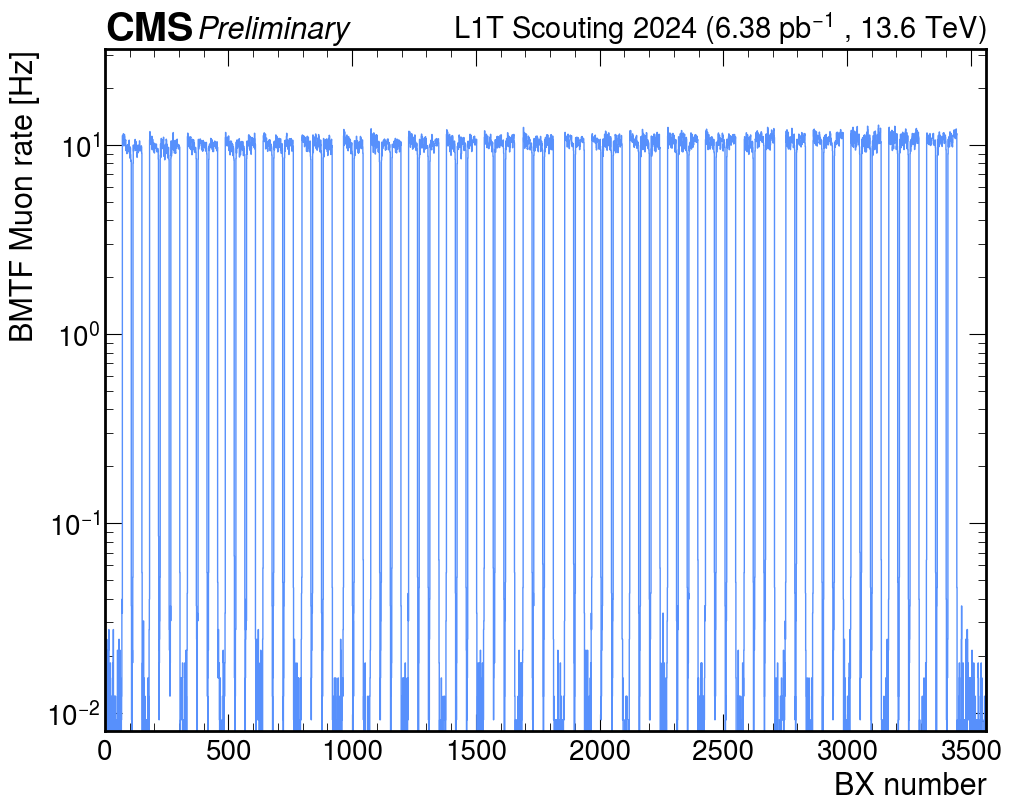

In [ ]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_BMTF_counts1 = np.bincount(Array.bx, weights=Array.nBmtfMuons)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_BMTF_counts1) / 14, histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_ylim(0.8e-2, 32)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF.pdf")

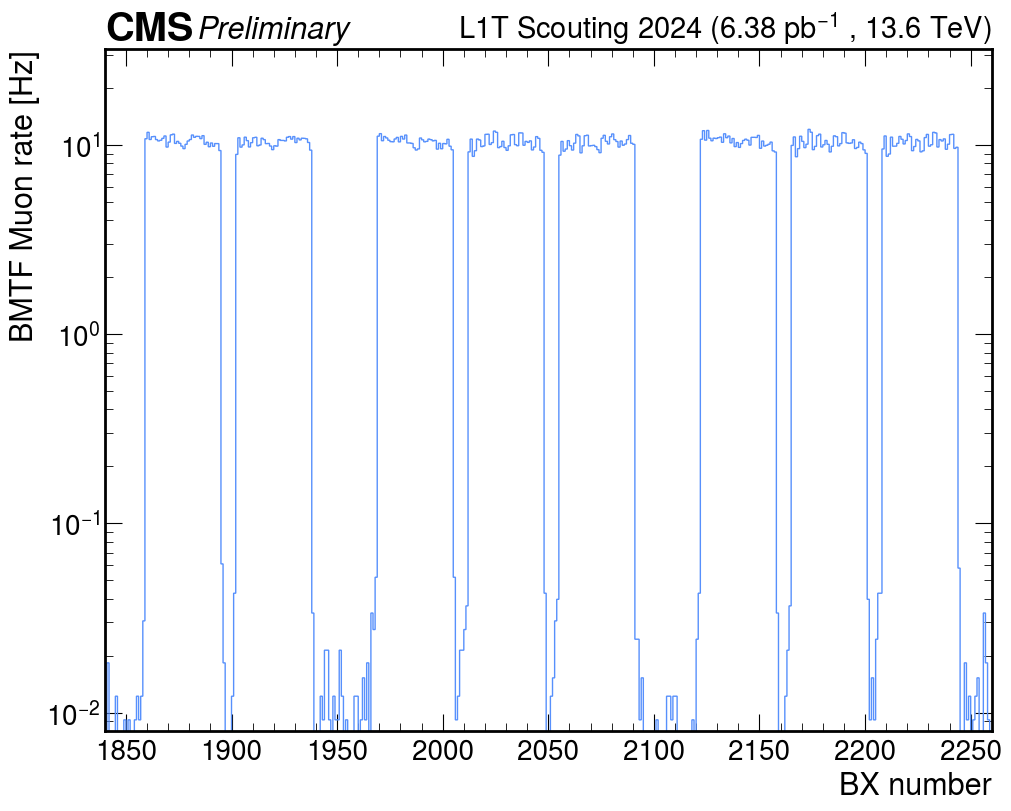

In [ ]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_BMTF_counts1) / 14, histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_ylim(0.8e-2, 32)
ax.set_xlim(1840, 2260)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_zoom.pdf")

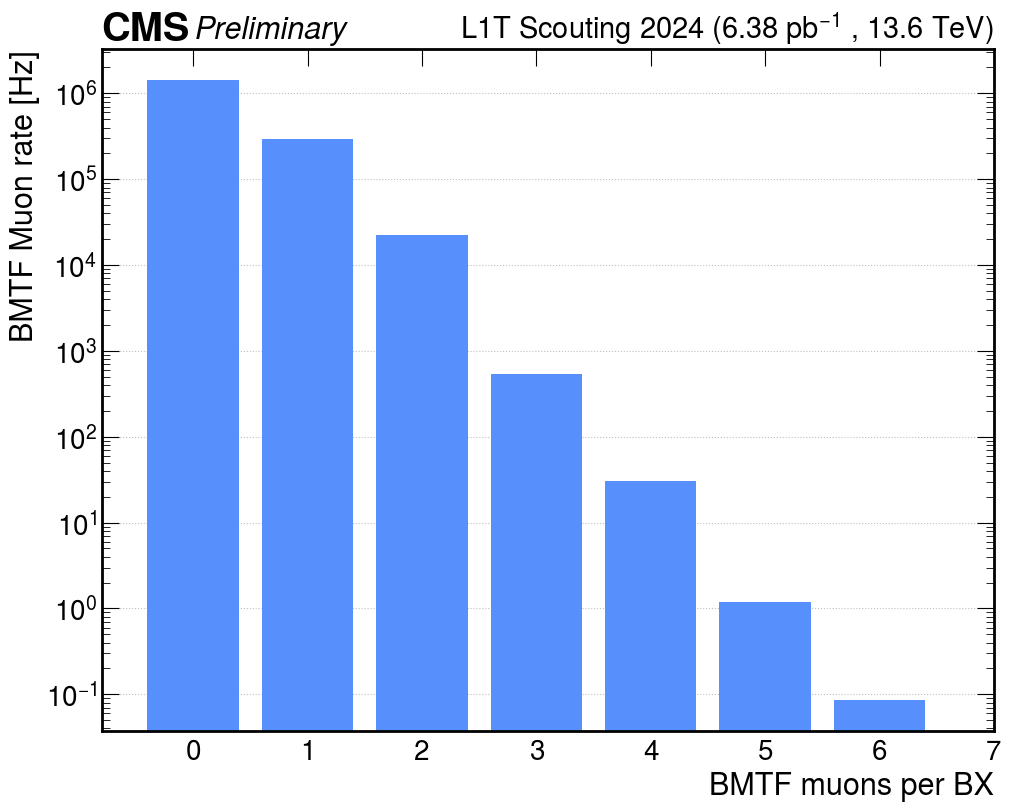

In [ ]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(7), ConvertToHz(np.bincount(Array.nBmtfMuons)))

ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF muons per BX')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(-0.8, 7)
ax.grid(visible=True, axis='y')
ax.set_axisbelow(True)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_Molteplicity.pdf")

In [ ]:
#AllBMTperOrbit = StubsPerOrbit(Array.bx, Array.nBmtfMuons)

In [ ]:
#ak.to_parquet(ak.Array(AllBMTperOrbit), "AllBMTperOrbit.parquet")

AllBMTperOrbit = ak.from_parquet("AllBMTperOrbit.parquet")

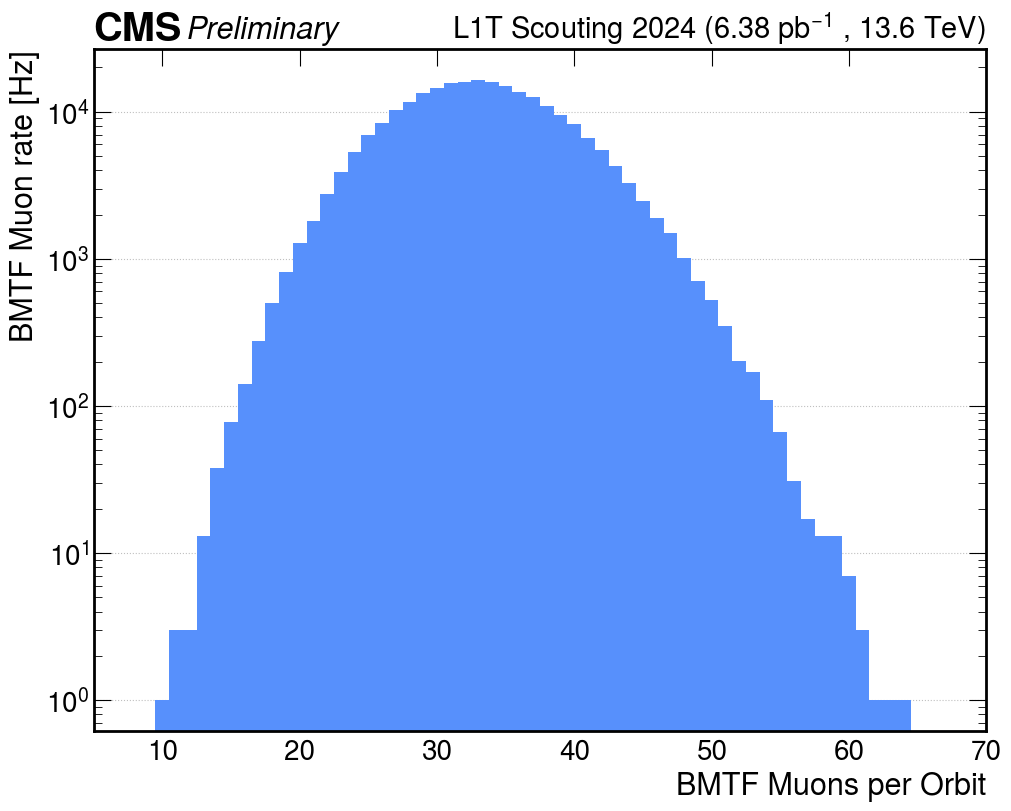

In [ ]:

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(1, len(AllBMTperOrbit) + 1), AllBMTperOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF Muons per Orbit')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(5, 70)
ax.grid(visible=True, axis='y')
ax.set_axisbelow(True)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_orbit.pdf")

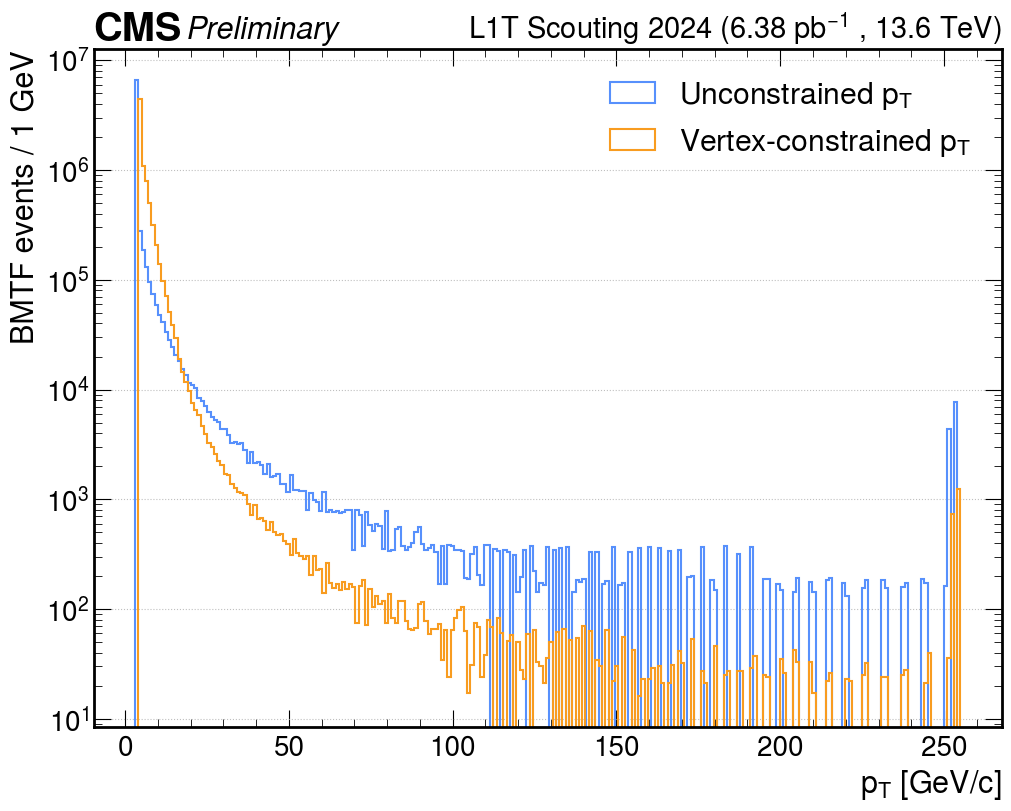

In [ ]:
#Plot di Pt e Ptu uniti


fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
MOREdraw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(ak.ravel(Array.bmtfPtu), bins = 250,  label='Unconstrained $p_T$', histtype='step', linewidth = 1.5)
ax.hist(ak.ravel(Array.bmtfPt), bins = 250, label='Vertex-constrained $p_T$', histtype='step', linewidth = 1.5)

ax.set_xlabel(r'$p_T$ [GeV/c]')
ax.set_ylabel(r'BMTF events / 1 GeV')
ax.set_axisbelow(True)

ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_PtPtu.pdf")

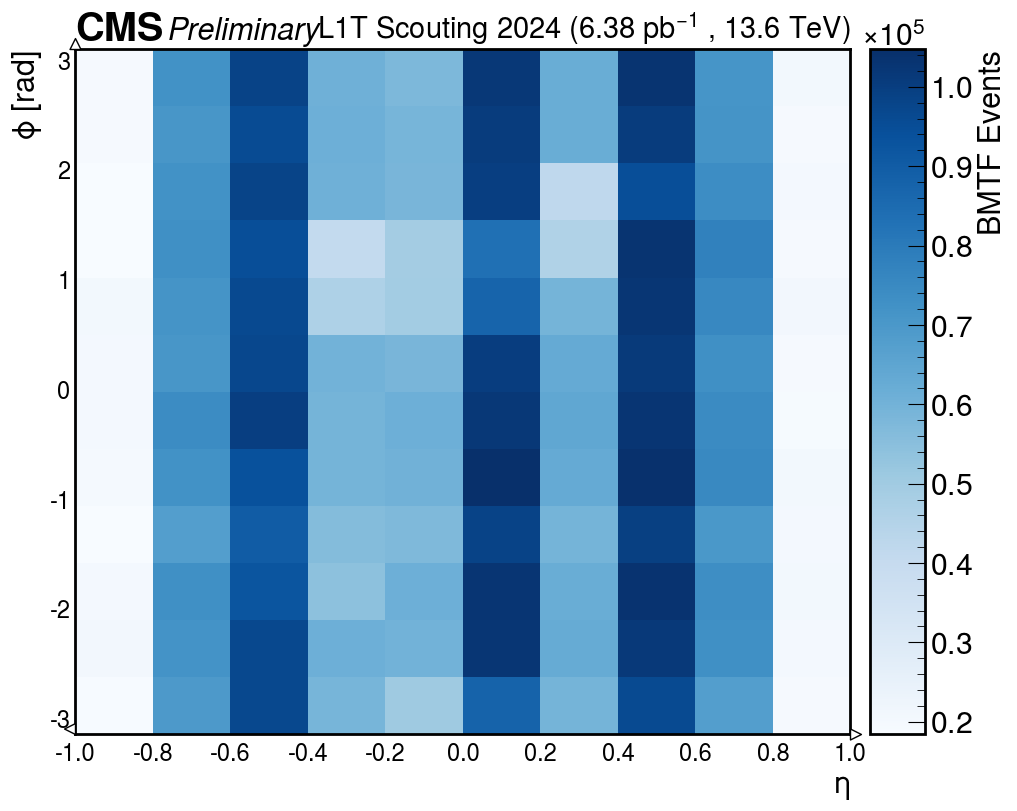

In [4]:
from matplotlib import ticker

binsPhi = np.array(np.arange(-np.pi, np.pi + 0.1, 0.52))
binsEta = np.array(np.arange(-1, 1.1, 0.2))


hist2d = hist.Hist(
    hist.axis.Variable(binsEta, name='Eta', ),
    hist.axis.Variable(binsPhi, name='Phi'),
)
hist2d.fill(Phi=ak.ravel(Array.bmtfPhi), Eta=ak.ravel(Array.bmtfEta))

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
MOREdraw_cms_label(ax, fontsize=FONTSIZE)

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF Events', fontsize=FONTSIZE)

#Notazione scientifica
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_scientific(True)  
cbar.formatter.set_powerlimits((-2, 2))  
cbar.update_ticks() 

ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$ [rad]')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/BMTFPhiEta.pdf")


plt.show()